In [180]:
 #install.packages("GGally")
 library(GGally)
 library(readxl)
#install.packages('dplyr')
 library(dplyr)
library("tibble")
#install.packages('tidyr')
library(tidyr)
#install.packages("scales")
library(scales)
library(psych)
#install.packages('pastecs')
library(pastecs)

Installing package into 'C:/Users/hichul/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'pastecs' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\hichul\AppData\Local\Temp\RtmpOyVH2O\downloaded_packages


Warning message:
"package 'pastecs' was built under R version 4.0.5"

Attaching package: 'pastecs'


The following object is masked from 'package:tidyr':

    extract


The following objects are masked from 'package:dplyr':

    first, last




In [146]:
df.wa = read_excel( "../../results/df-water-access.xlsx" ,sheet=1)
df.exp =read_excel("../../results/df-water-explore.xlsx" ,sheet=1)
df.cluster = read_excel("../../results/df-fa-seven-cluster-rank.xlsx" ,sheet=1)
df.wb = read_excel("../../results/df-wb.xlsx" ,sheet=1 )
df.exp$clusters <- as.factor(df.cluster$clusters)
df <- merge(x = df.exp,
              y = df.wb,
              by = c("Country"))

df <- df[, c(1:13, 17,21)]

#scaling the world bank data similar to DHS aggregation out of 100
df.wb <- df[,c(9:15)]
df.wb <- data.frame(lapply(df.wb, function(x) scale(x, center = FALSE, scale = max(x, na.rm = TRUE)/100)))
df.scale <- cbind(df, df.wb)
df.scale <- df.scale[,c(1:8,15:21)]
                           
df <- df%>%
  mutate(clusters=case_when(
    .$clusters=="1" ~ "Decentralized",
    .$clusters=="2" ~ "Hybrid",
    .$clusters=="3" ~ "Centralized",
      ))           
                        
clusters <- df$clusters
df.wa$clusters <- clusters
    
df <- df[,c(1,2,3,4,5,6,7,9,10,11,12,13,14,15,8)]       

                           df.wa <- df.wa %>% 
  rename(
    'Piped (Dwelling)' = phom ,
     'Piped (Yard)' = pipy,
     'Public Tap' = ptap,
      'Borehole'=bore,
      'Protected Well'=pwel,
     'Protected Spring' =pspr,
      'Rain'= rain,
      'Unprotected Well'=uwel,
      'Unprotected Spring'=uspr,
     'Truck' =truc,
      'Tanker Cart'=ctan,
      'Bottled'=bott,
     'Other' =othw,
     'Surface' =surw,
      'T<30min'=tles,
      'T>30min' =tmor,
     'On-Premises' =watp,
    )
                           
                           df <- df %>% 
  rename(
    'Bicycle' = bicy ,
     'Animal Cart' = cart,
     'Motorcycle' = mcyc,
      'Car'=pcar,
      'Boat'=boat,
     'Gini Index' =wigc,
      'GDP'= cgdp,
      'Total Population'=tpop,
      'Urban Population'=upop,
     'Pop. density' =popd,
      'Land area'=land,
      'Renew. internal freshwater '=rifr,
     'Precipitation' =prec
    )

Country,Piped (Dwelling),Piped (Yard),Public Tap,Borehole,Protected Well,Protected Spring,Rain,Unprotected Well,Unprotected Spring,Truck,Tanker Cart,Bottled,Other,Surface,T<30min,T>30min,On-Premises,clusters
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Afghanistan,2.3,4.8,14.2,20.1,18.5,4.7,0.4,11.1,8.6,1.5,4.4,0.2,1.7,7.3,45.2,8.2,45.3,Decentralized
Albania,48.8,5.2,2.4,1.4,4.1,2.5,0.0,0.8,0.8,14.1,0.2,19.6,0.1,0.0,20.6,1.1,77.9,Hybrid
Angola,4.3,9.7,10.3,1.9,9.1,3.3,1.7,8.3,4.8,9.7,4.3,1.2,1.8,18.0,46.1,15.6,34.5,Decentralized
Armenia,88.3,8.0,0.5,0.2,0.2,1.0,0.0,0.0,0.1,1.5,0.0,0.0,0.0,0.0,1.6,0.1,97.6,Centralized
Azerbaijan,34.0,19.7,3.5,9.3,6.2,7.5,0.0,0.2,1.1,9.5,0.7,0.1,1.1,7.0,18.7,4.4,75.9,Centralized
Bangladesh,4.3,3.3,2.7,86.4,0.2,0.0,0.4,0.6,0.3,0.0,0.1,0.3,0.1,1.2,22.7,1.6,75.5,Hybrid


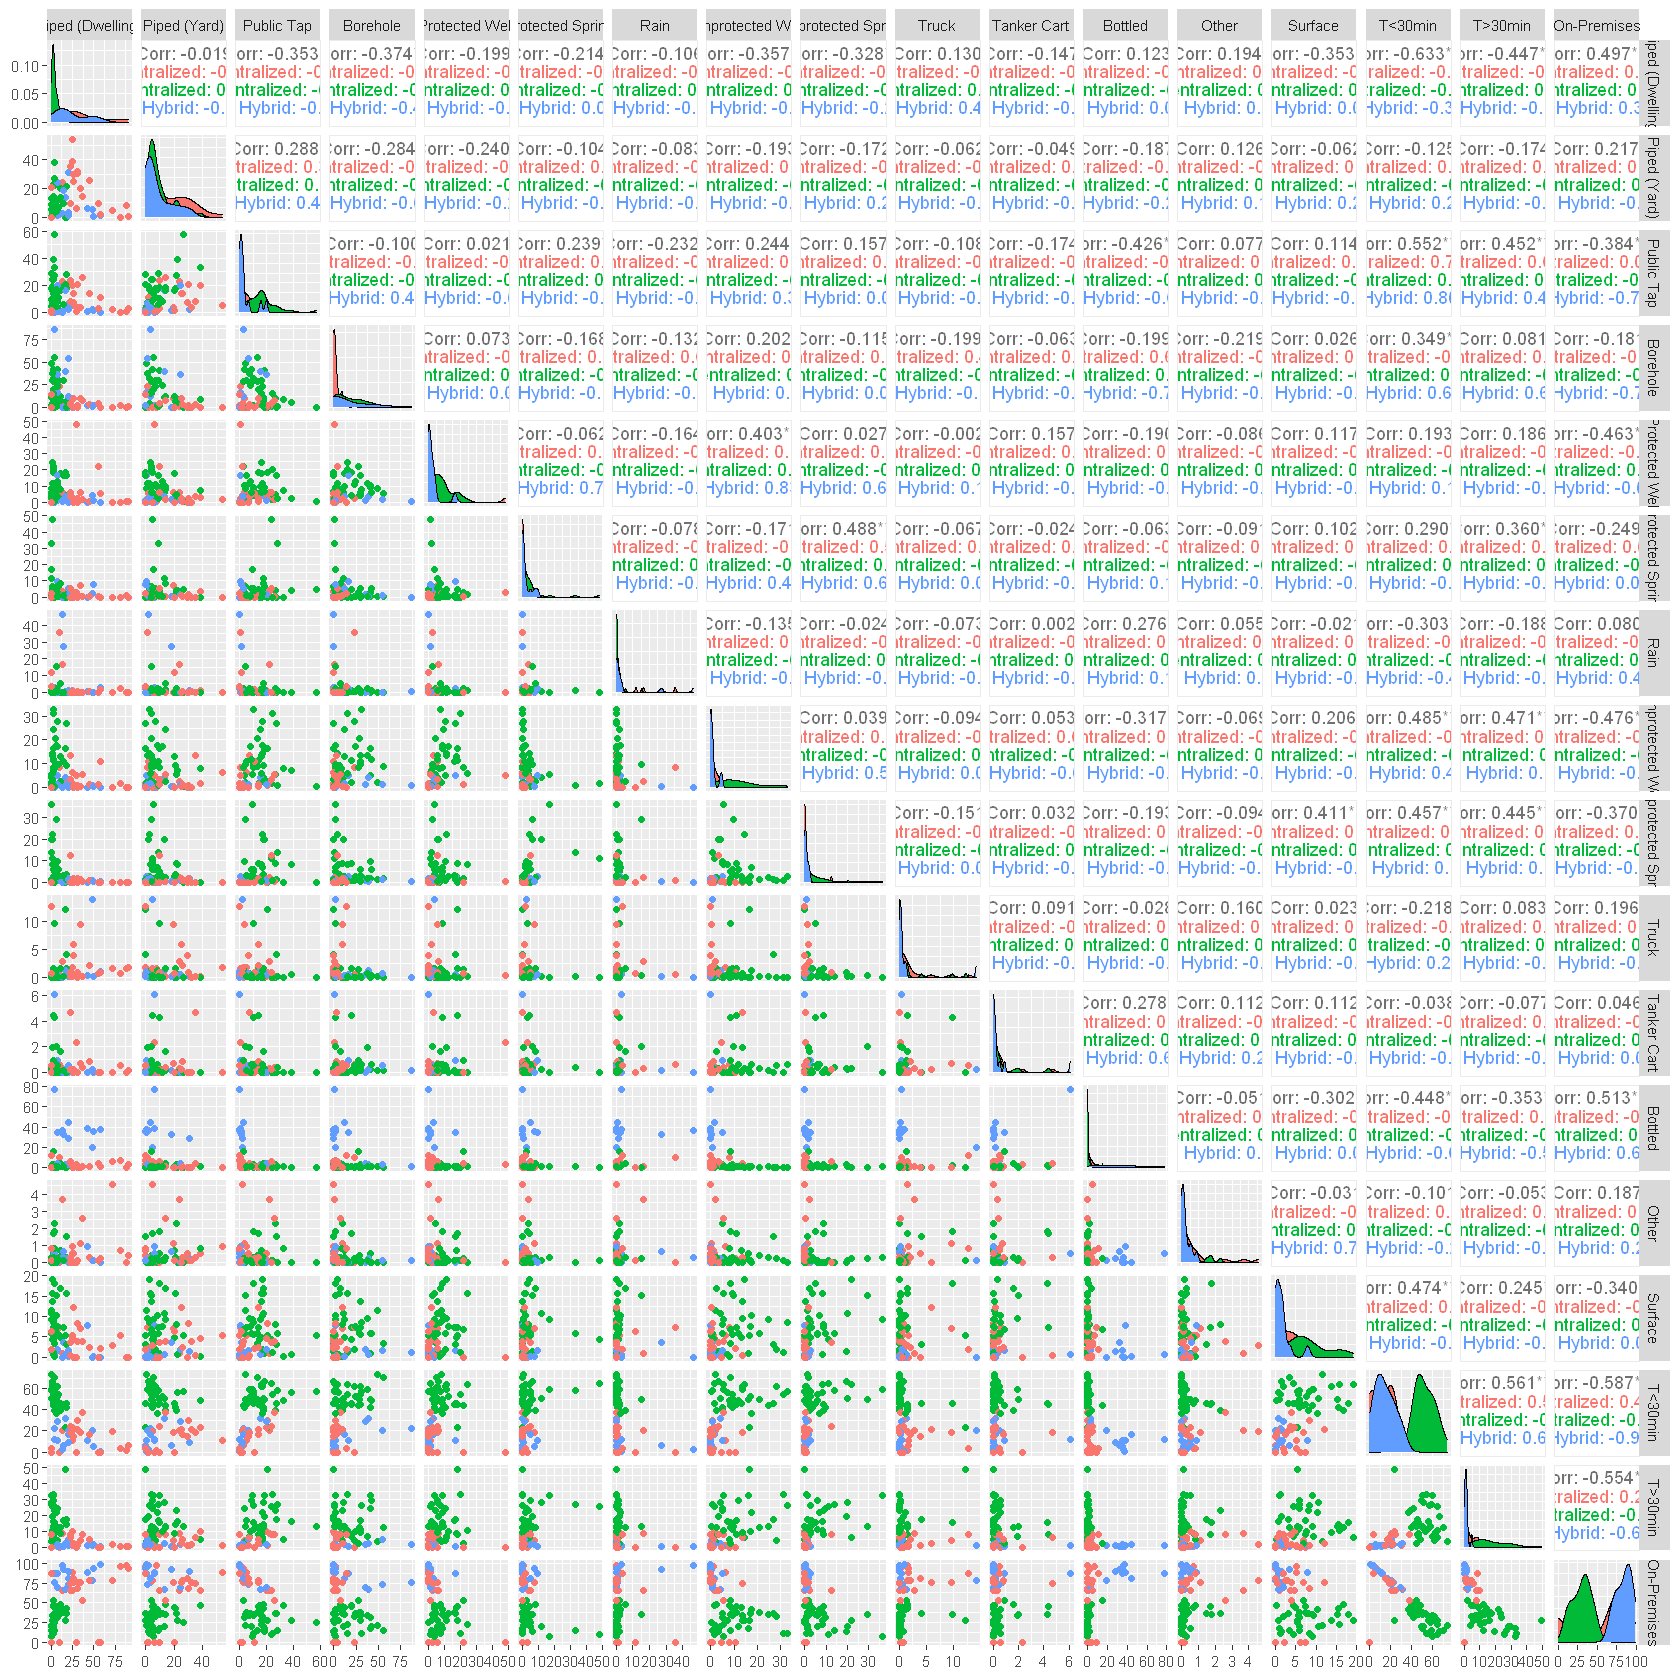

In [92]:
# Data Analysis for 17 Water accessiiblity variables with ggpairs
head(df.wa)
options(repr.plot.width=14, repr.plot.height=14)
par(mar = c(1, 1, 1, 4), cex.axis = 1, cex.lab = .8) 
ggpairs(df.wa, columns = 2:18, ggplot2::aes(colour=clusters))

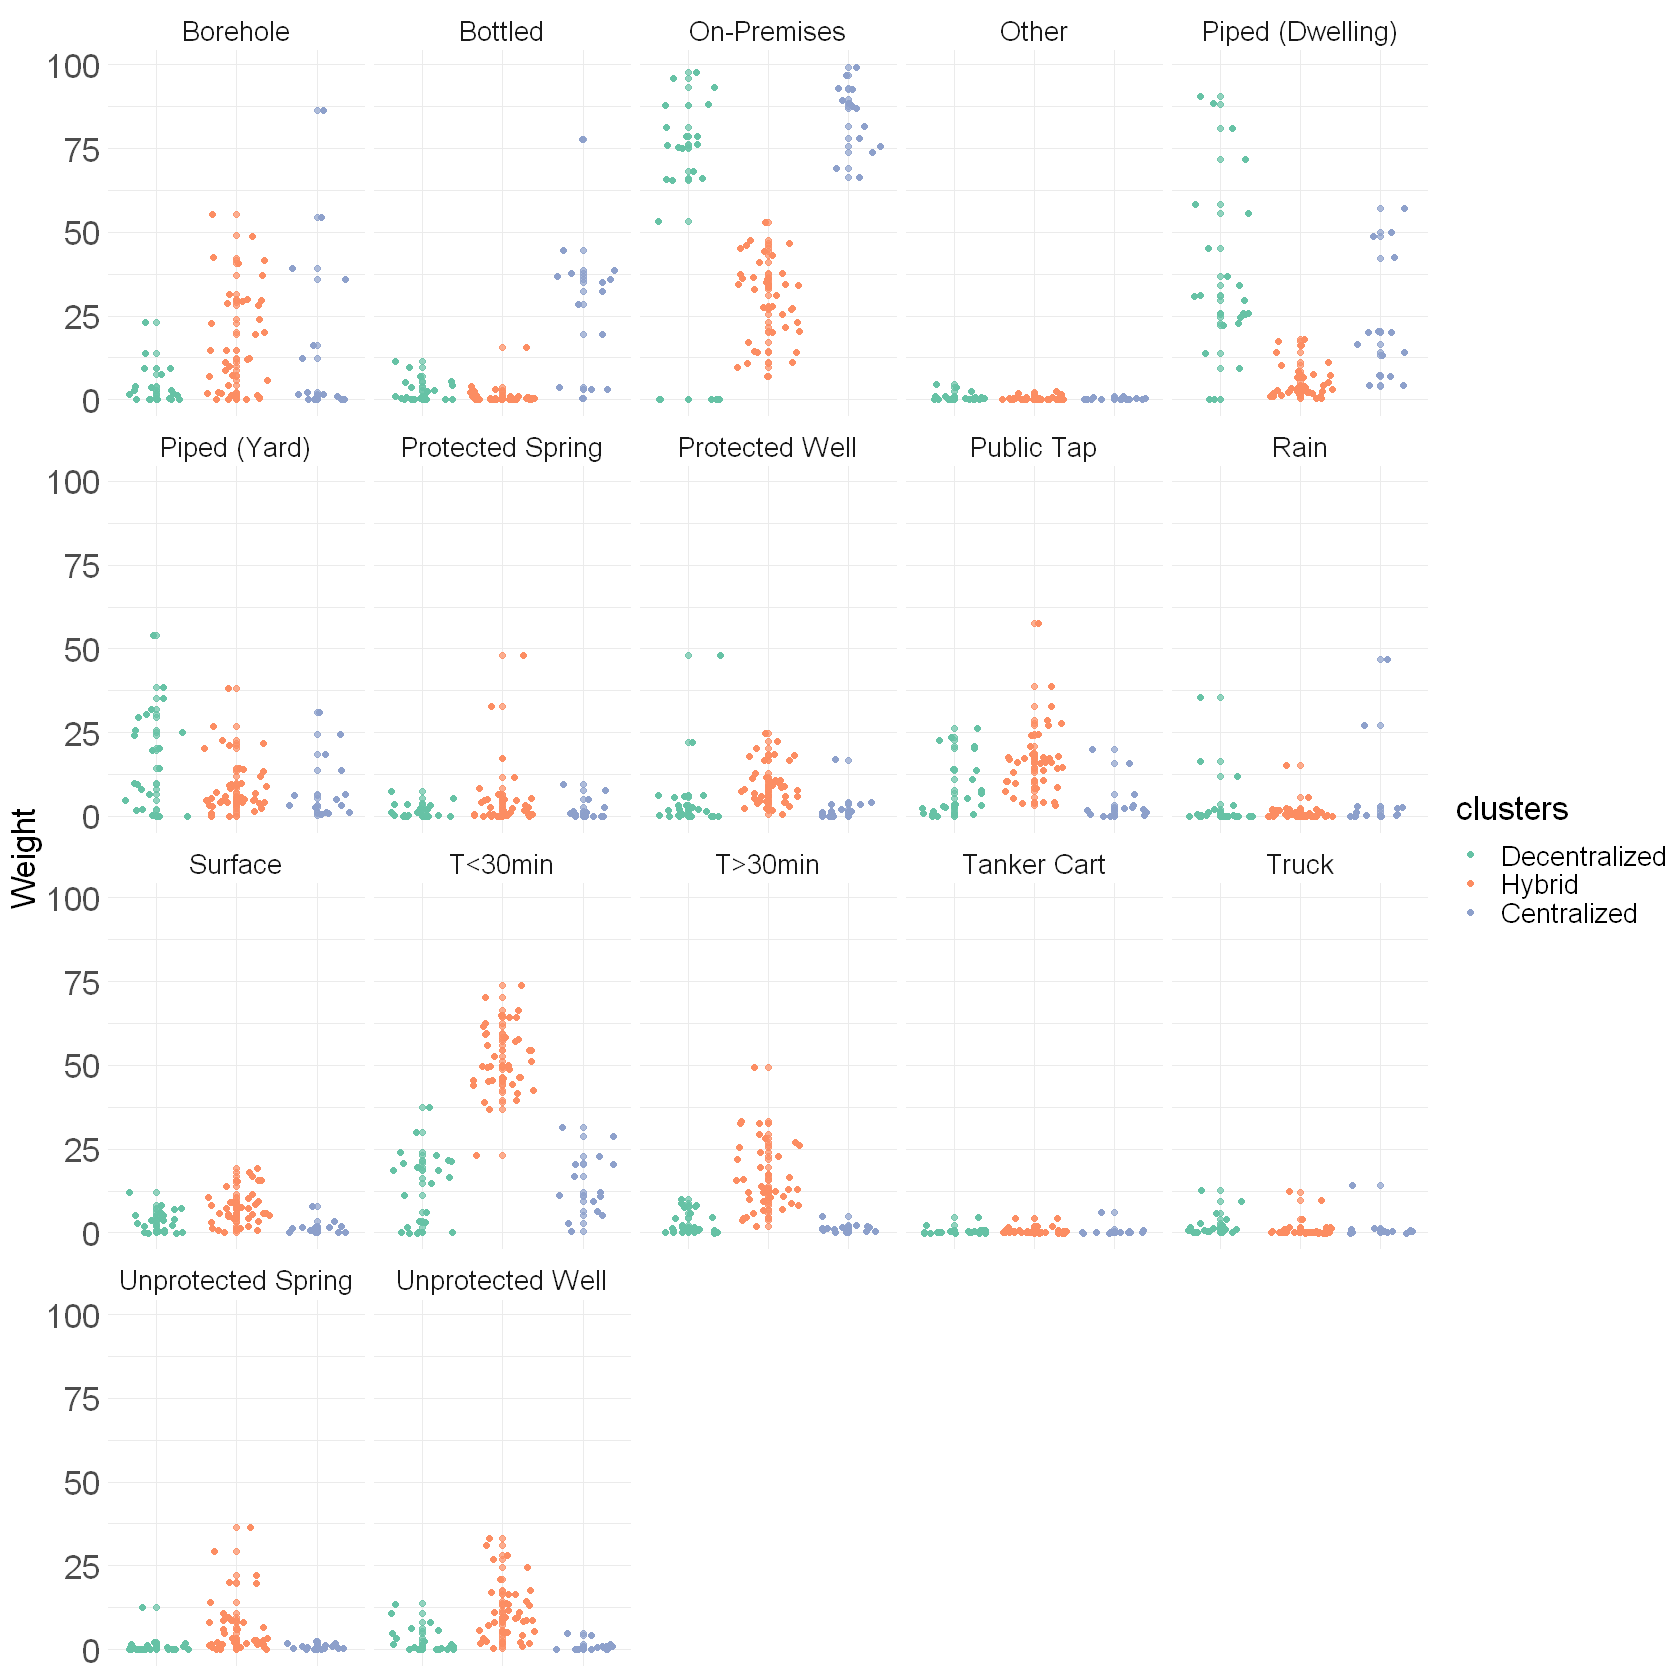

In [153]:
countries_gathered <- df.wa %>% gather(Measure, Weight, 'Piped (Dwelling)':'On-Premises') 


ggplot(countries_gathered, aes(clusters, Weight, color = clusters)) +
  theme_minimal() +
  geom_point(alpha = 0.7) +
  geom_jitter() +
  facet_wrap(~Measure)  + 
  scale_color_manual(name = 'clusters', labels = c("Decentralized" , "Hybrid", "Centralized"),
                     values=c('#66c2a5','#fc8d62', '#8da0cb') ) +
    theme(text = element_text(size=20) , axis.title.x = element_blank(), axis.text.x=element_blank()) + #Font size
    theme(axis.text = element_text(size = 20)) + #All tick size  
    theme(axis.title = element_text(size = 20))  # Adjusting Axis Title   

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



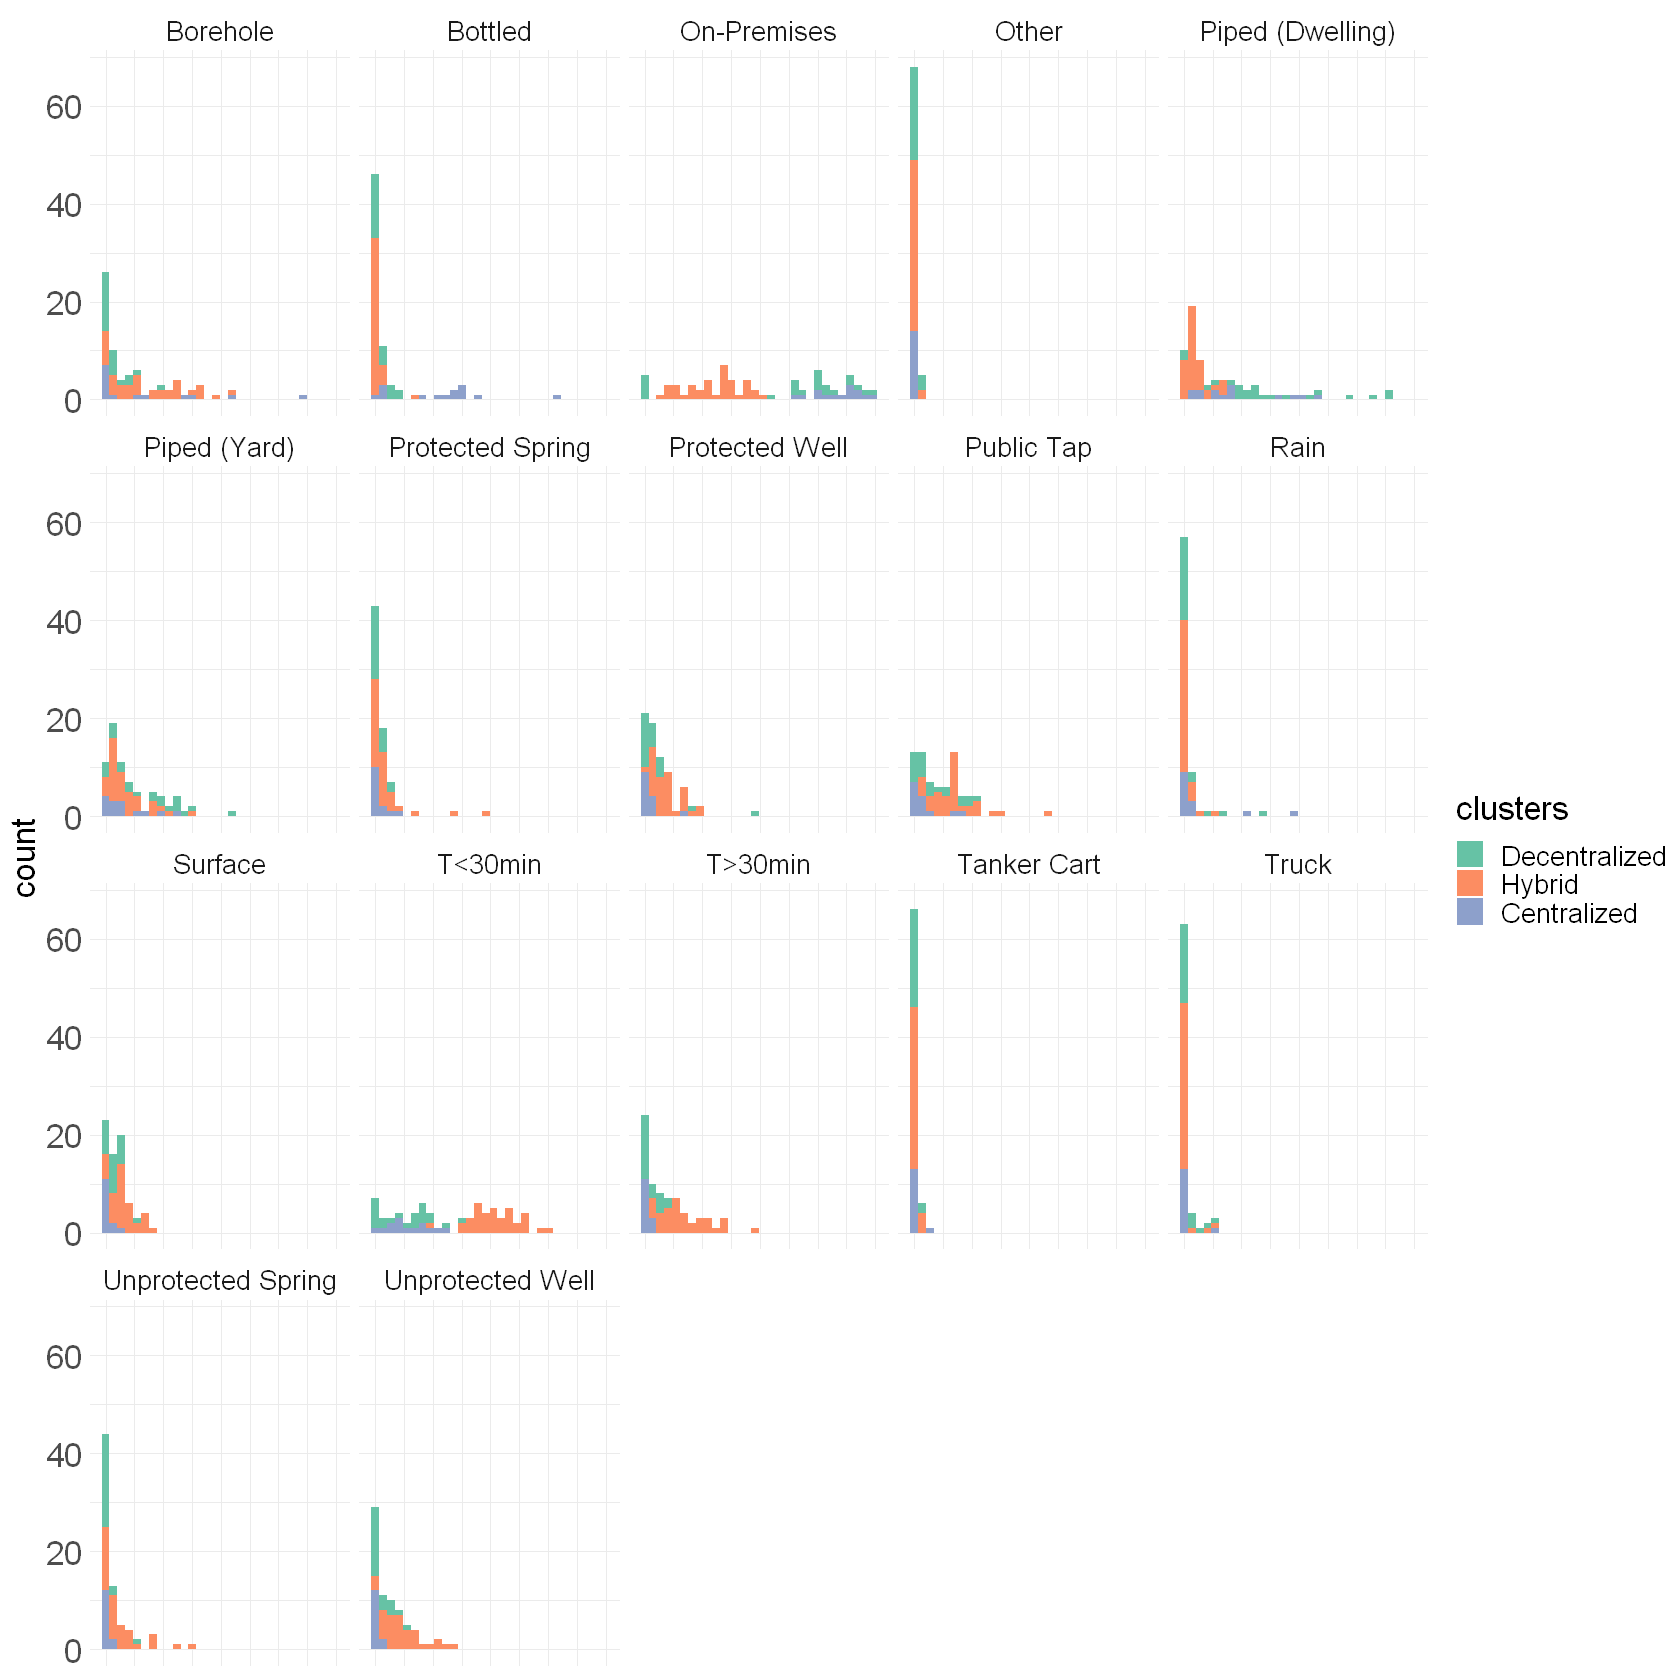

In [172]:
 ggplot(countries_gathered, aes(Weight, fill = clusters)) +
  theme_minimal() +
  geom_histogram() +
  facet_wrap(~Measure)  + 
  scale_fill_manual(name = 'clusters', labels = c("Decentralized" , "Hybrid", "Centralized"),
                     values=c('#66c2a5','#fc8d62', '#8da0cb') ) +
    theme(text = element_text(size=20) , axis.title.x = element_blank(), axis.text.x=element_blank()) + #Font size
    theme(axis.text = element_text(size = 20)) + #All tick size  
    theme(axis.title = element_text(size = 20))  # Adjusting Axis Title   


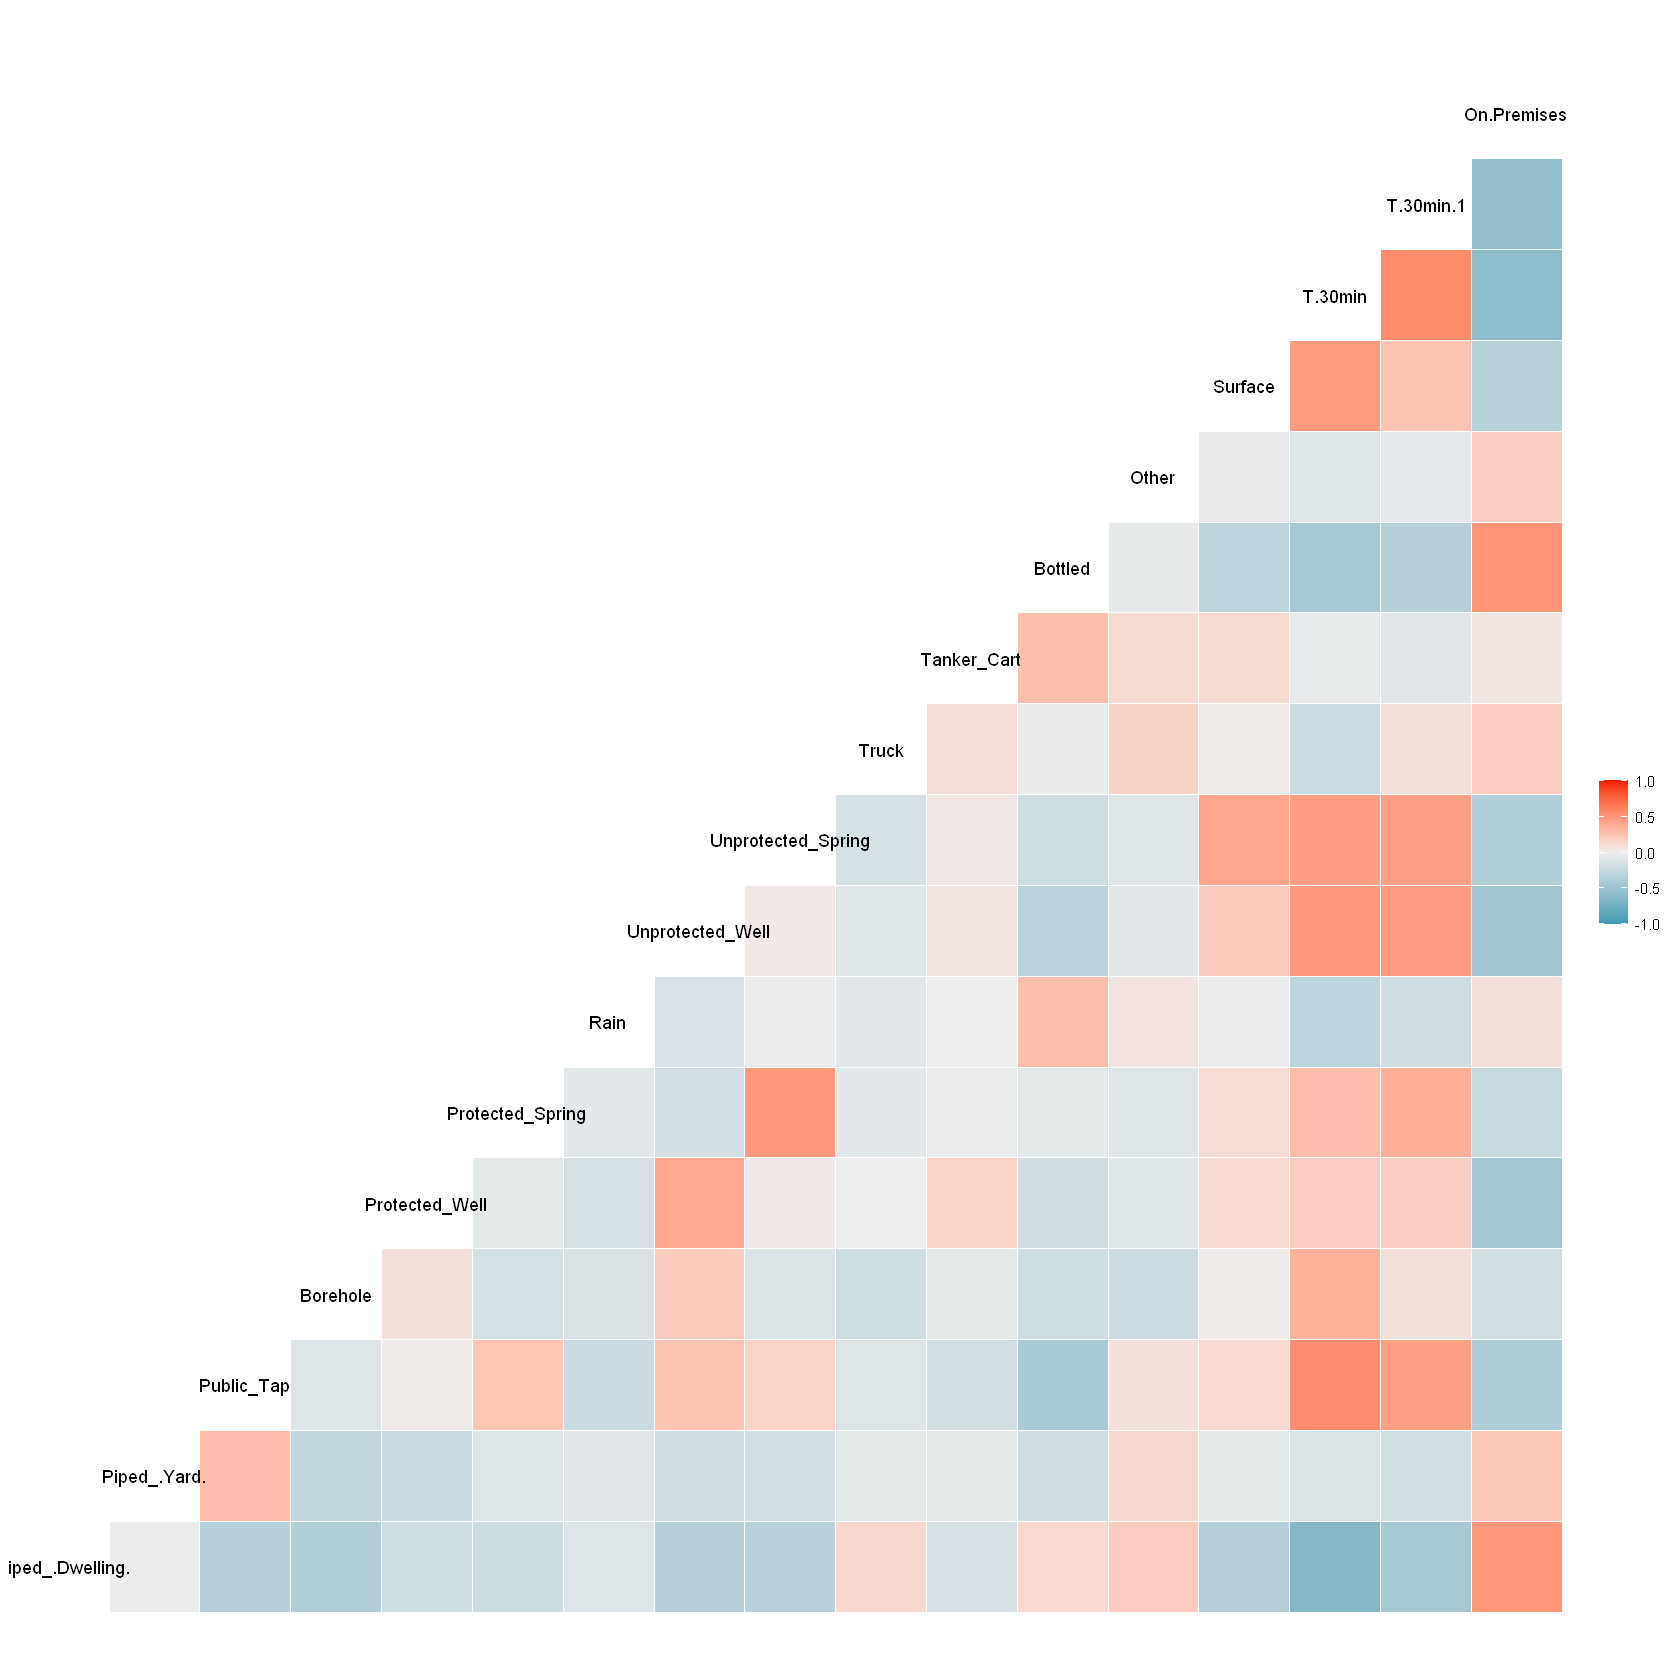

In [103]:
#Correlation graph
ggcorr(df.wa[,c(2:18)])

,Country,Bicycle,Animal Cart,Motorcycle,Car,Boat,Gini Index,GDP (US$),Total Population,Urban Population,Population density (per sq. km),Land area (sq. km),Renewable internal freshwater resources (per capita cu. m),Precipitation (mm per year),clusters
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Afghanistan,30.0,5.8,35.2,11.8,0.0,0.1,18353881130,37172386,25.495,56.93776,652860,1299.0269,327,Decentralized
2,Albania,26.4,3.2,9.6,37.0,0.7,0.1,15147020535,2866376,60.319,104.61226,27400,9361.5460,1485,Hybrid
3,Angola,4.6,1.3,17.8,10.9,0.4,0.3,101353230785,30809762,65.514,24.71305,1246700,4963.6533,1010,Decentralized
4,Armenia,8.6,0.4,0.2,39.2,0.3,0.1,12457941907,2951776,63.149,103.68022,28470,2329.1833,562,Centralized
5,Azerbaijan,6.9,3.3,1.1,20.4,0.1,0.0,47112941176,9939771,55.680,120.23432,82670,823.5207,447,Centralized
6,Bangladesh,25.1,0.0,6.4,0.8,0.0,0.3,274039092455,161356039,36.632,1239.57931,130170,657.6039,2666,Hybrid


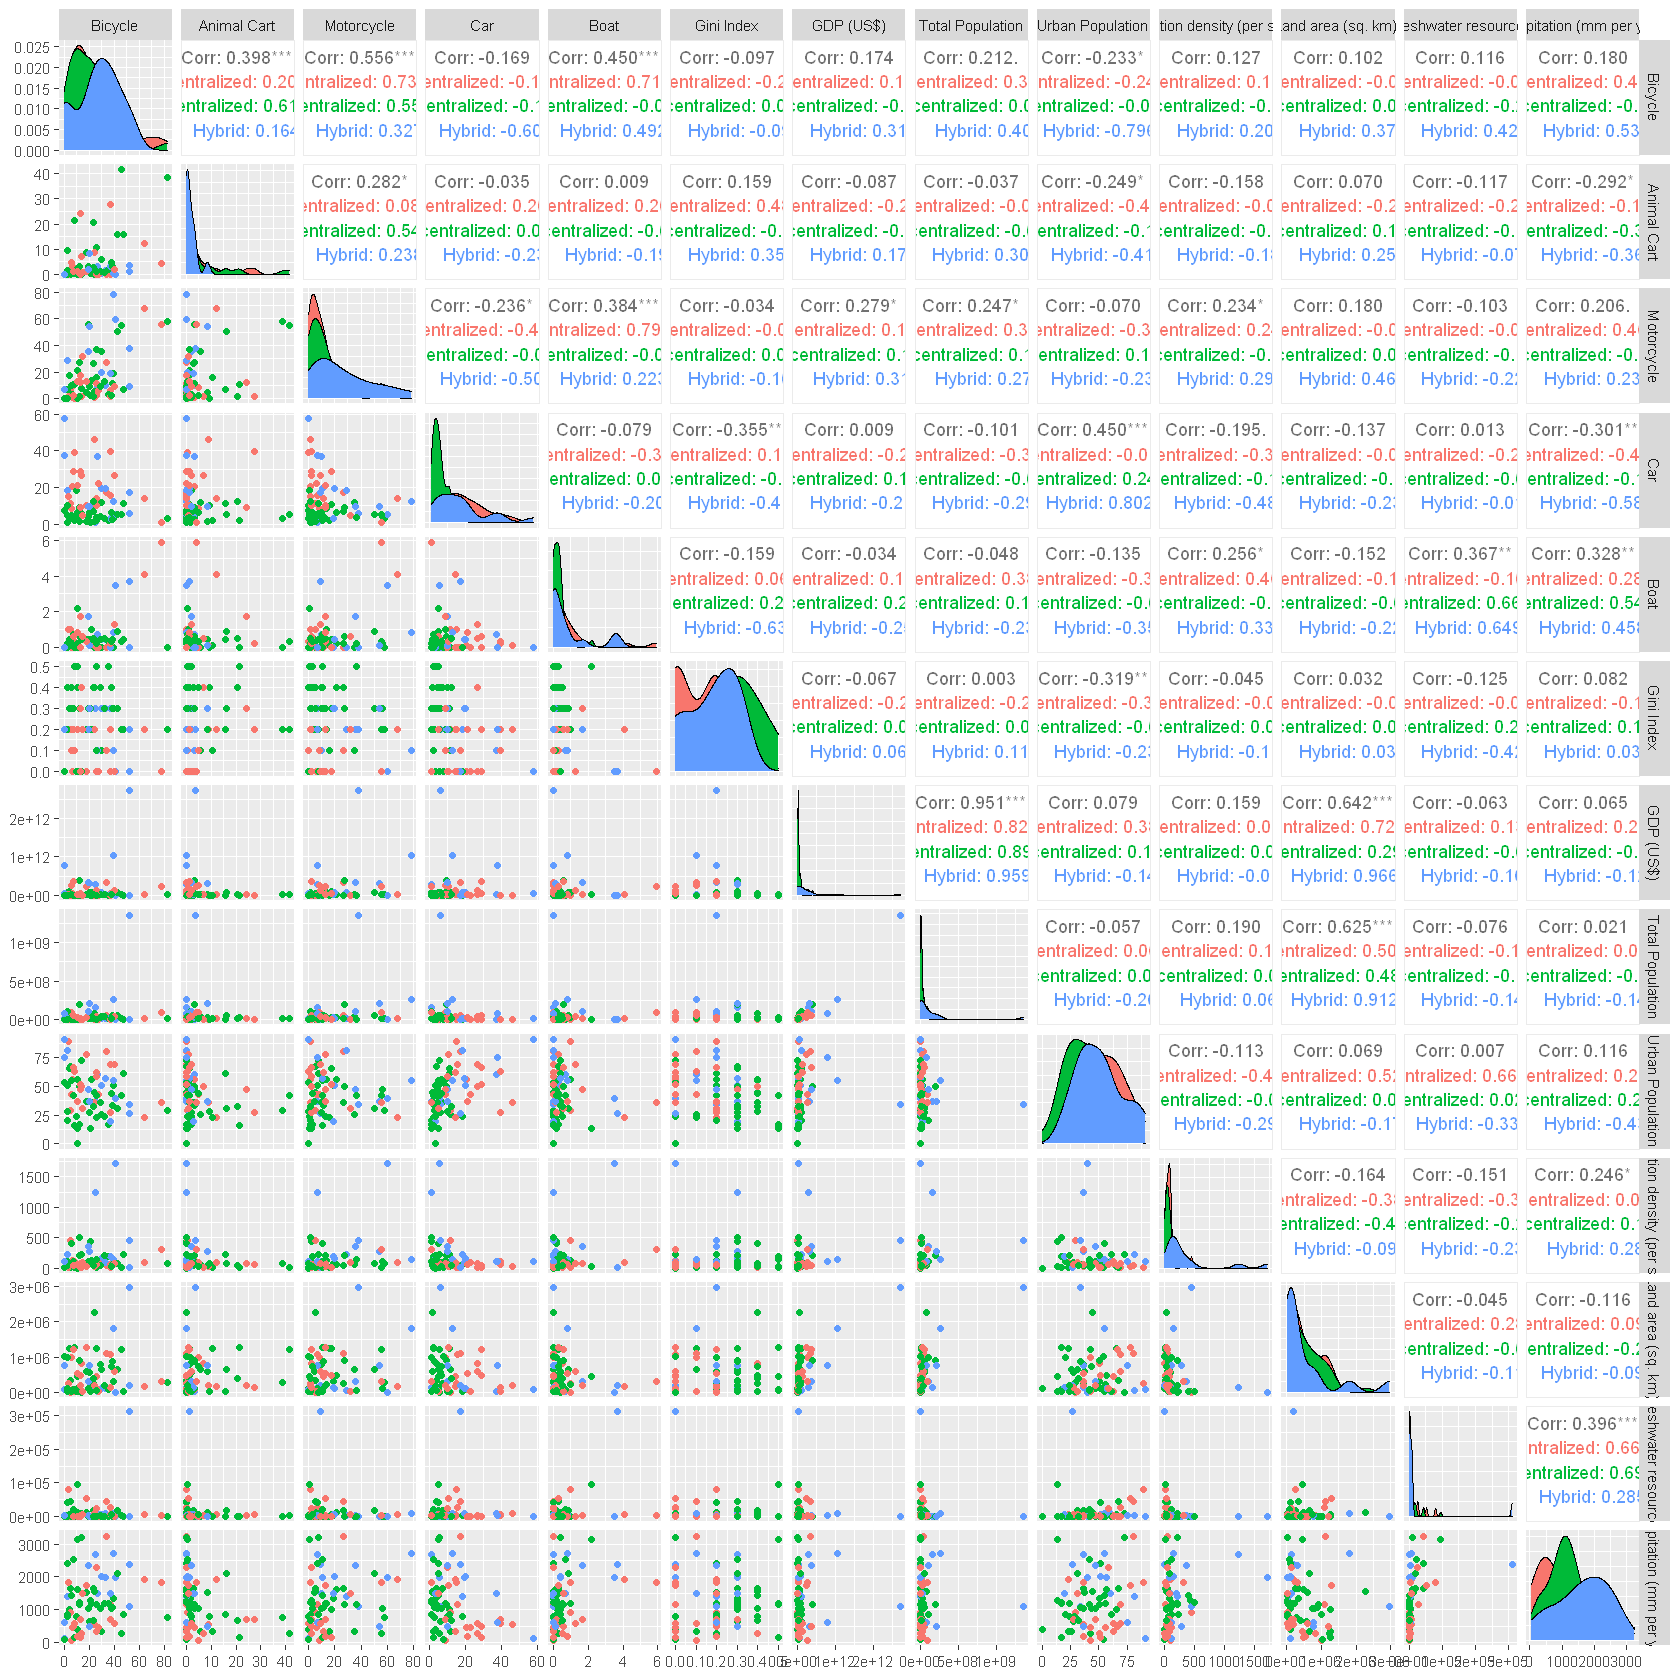

In [100]:
#Data Anaylsis for 13 explnatory variables with ggpairs
head(df)
options(repr.plot.width=14, repr.plot.height=14)
par(mar = c(1,1,1,4), cex.axis = 1, cex.lab = .8) 
ggpairs(df, columns = 2:14, ggplot2::aes(colour=clusters))

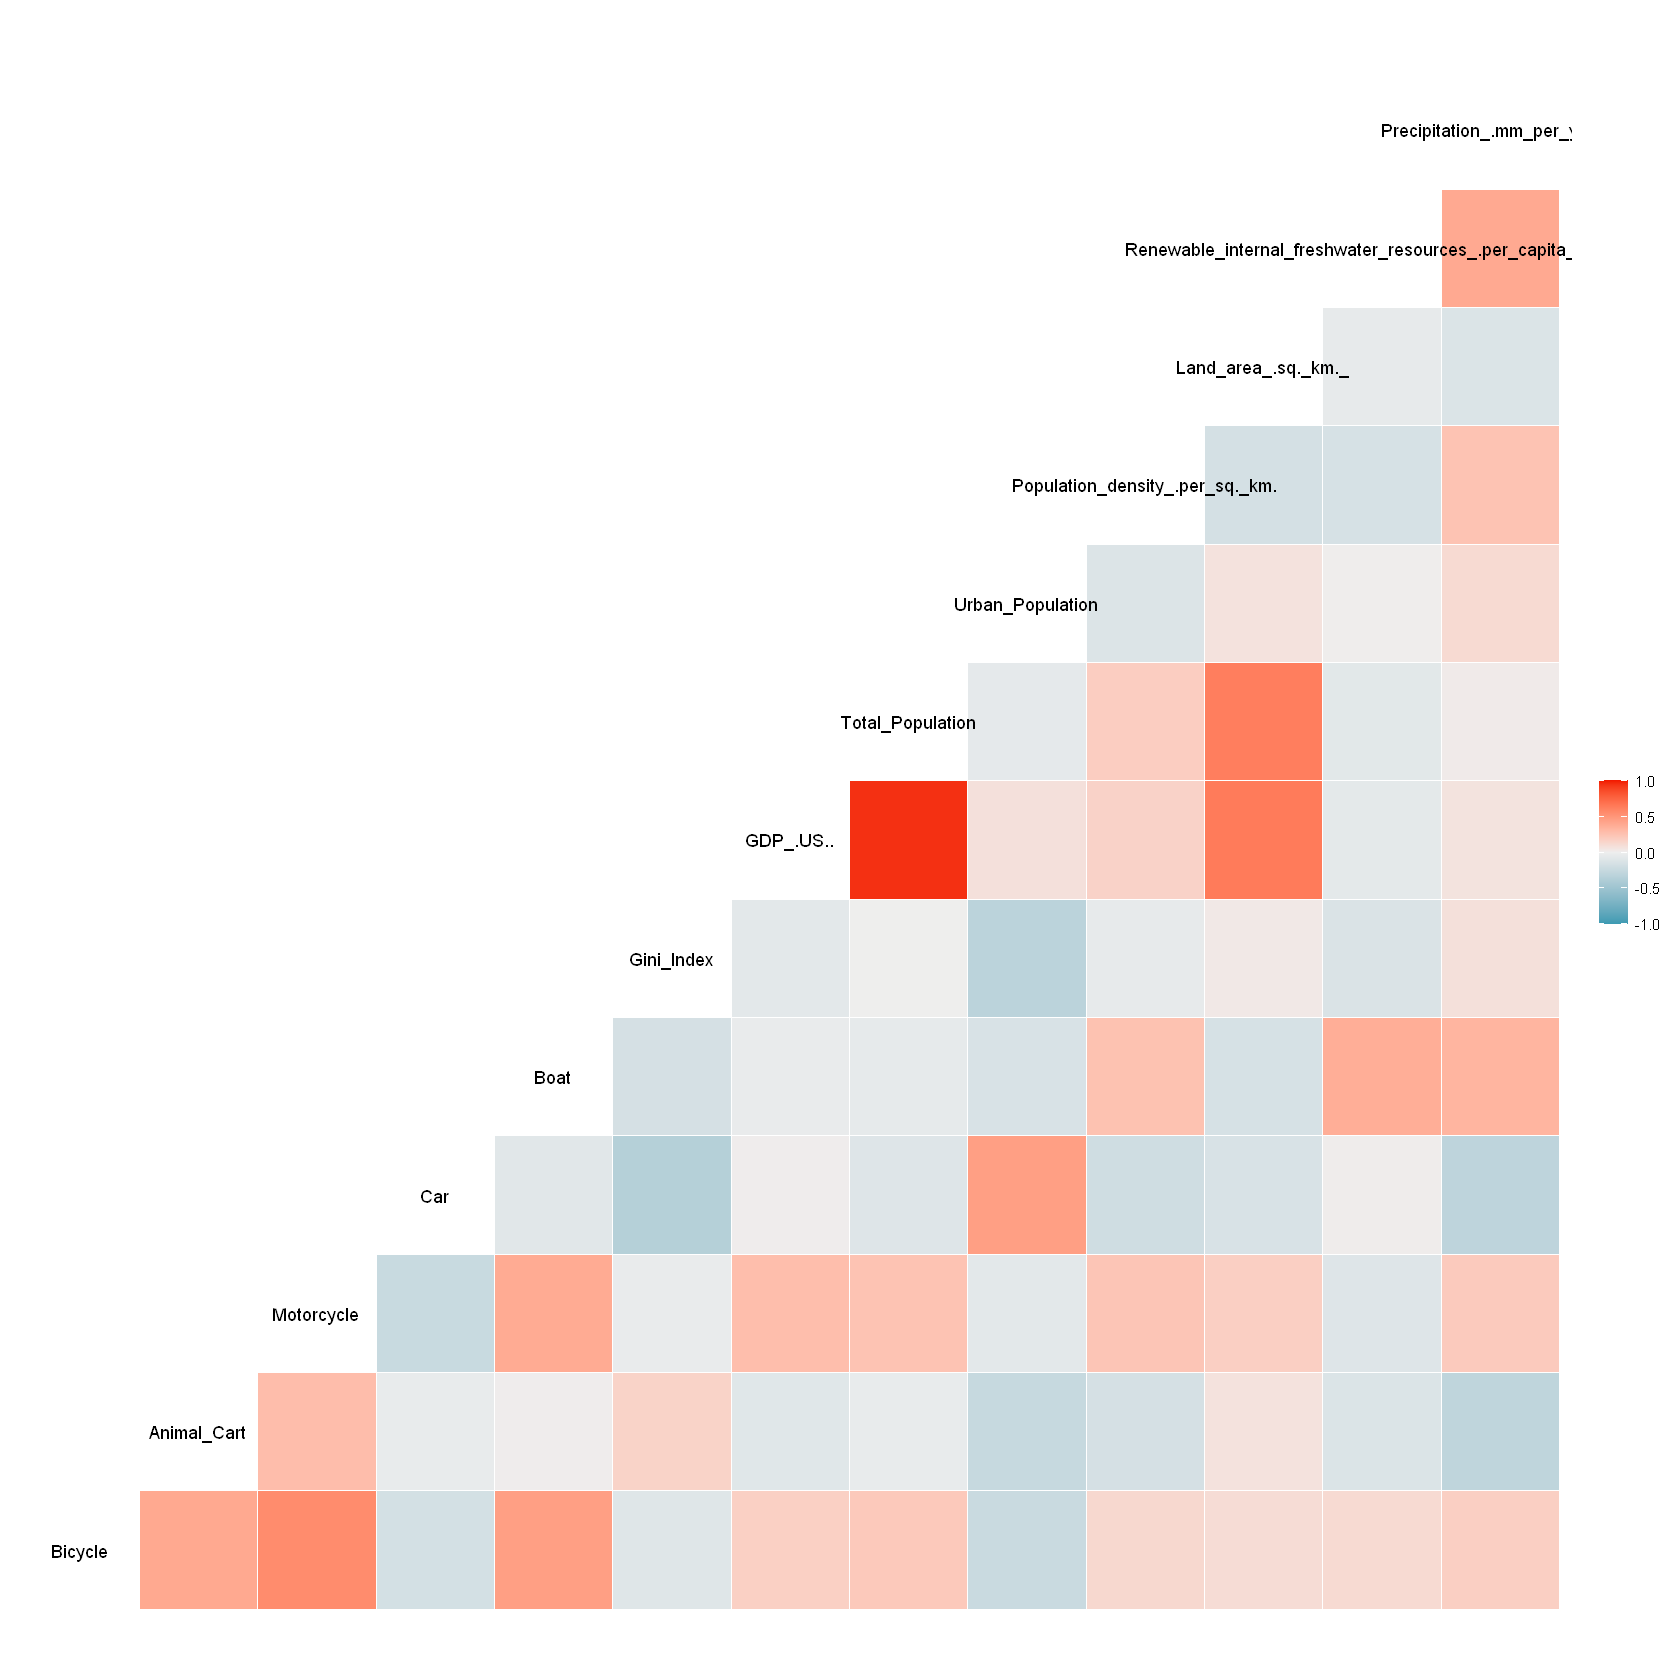

In [102]:
#Correlation graph
ggcorr(df[,c(2:14)])

,Country,Bicycle,Animal Cart,Motorcycle,Car,Boat,Gini Index,GDP,Total Population,Urban Population,Pop. density,Land area,Renew. internal freshwater,Precipitation,clusters
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Afghanistan,30.0,5.8,35.2,11.8,0.0,0.1,18353881130,37172386,25.495,56.93776,652860,1299.0269,327,Decentralized
2,Albania,26.4,3.2,9.6,37.0,0.7,0.1,15147020535,2866376,60.319,104.61226,27400,9361.5460,1485,Hybrid
3,Angola,4.6,1.3,17.8,10.9,0.4,0.3,101353230785,30809762,65.514,24.71305,1246700,4963.6533,1010,Decentralized
4,Armenia,8.6,0.4,0.2,39.2,0.3,0.1,12457941907,2951776,63.149,103.68022,28470,2329.1833,562,Centralized
5,Azerbaijan,6.9,3.3,1.1,20.4,0.1,0.0,47112941176,9939771,55.680,120.23432,82670,823.5207,447,Centralized
6,Bangladesh,25.1,0.0,6.4,0.8,0.0,0.3,274039092455,161356039,36.632,1239.57931,130170,657.6039,2666,Hybrid


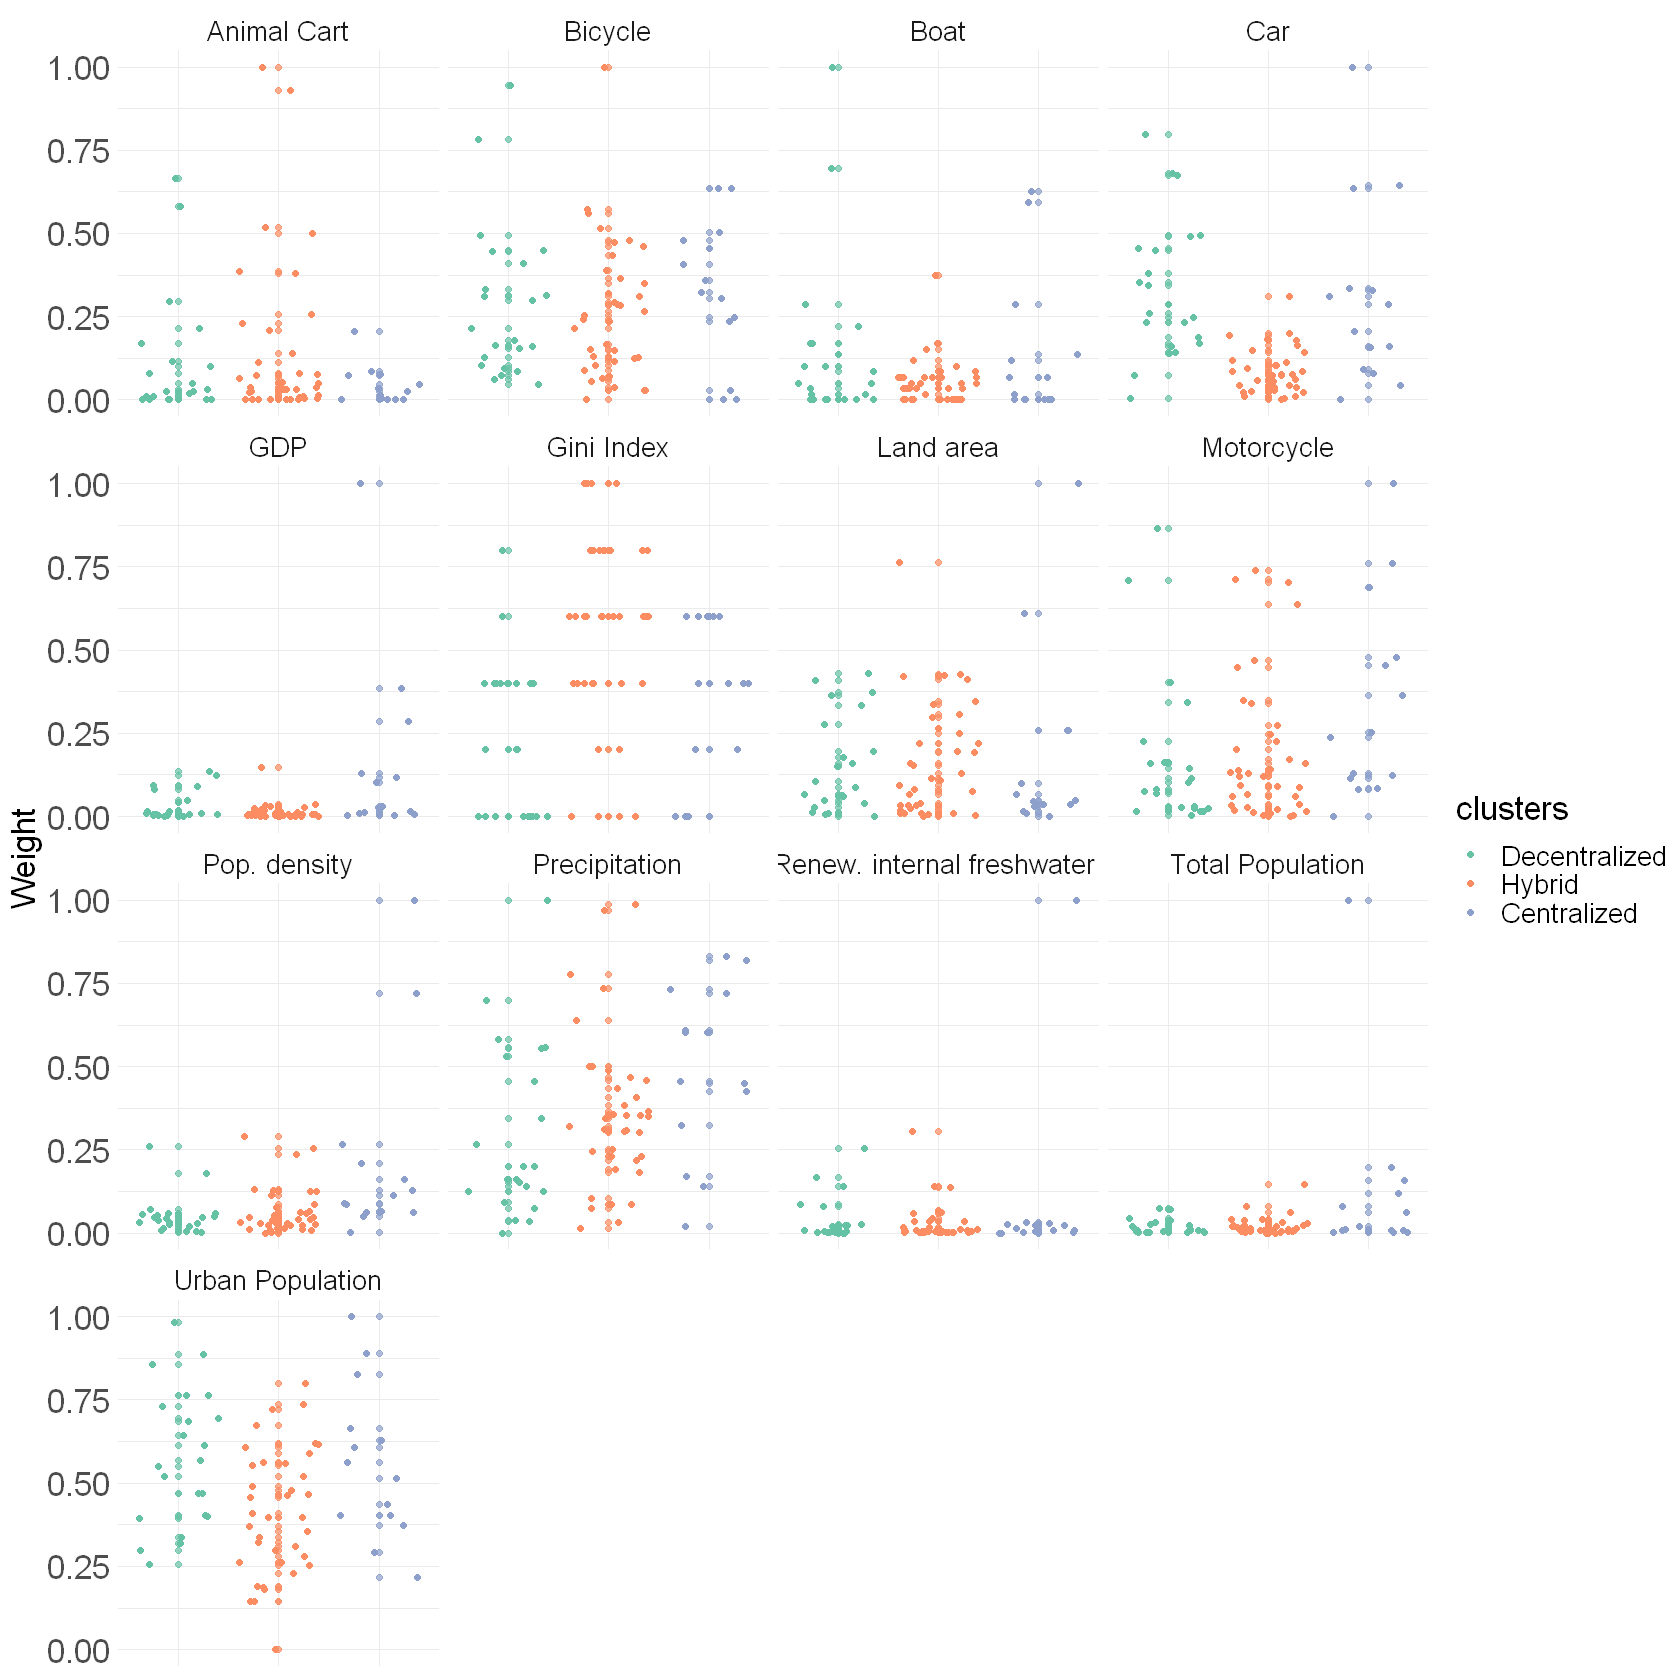

In [151]:
#Scale version
df.scale = as.data.frame(apply(as.matrix(df[,c(2:14)]), 2, rescale))
df.scale <- cbind(df[,c(1,15)],df.scale)
head(df)

df_gathered <- df.scale %>% gather(Measure, Weight, 'Bicycle':'Precipitation') 


ggplot(df_gathered, aes(clusters, Weight, color = clusters)) +
  theme_minimal() +
  geom_point(alpha = 0.7) +
  geom_jitter() +
  facet_wrap(~Measure)  + 
  scale_color_manual(name = 'clusters', labels = c("Decentralized" , "Hybrid", "Centralized"),
                     values=c('#66c2a5','#fc8d62', '#8da0cb') ) +
    theme(text = element_text(size=20) , axis.title.x = element_blank(), axis.text.x=element_blank()) + #Font size
    theme(axis.text = element_text(size = 20)) + #All tick size  
    theme(axis.title = element_text(size = 20))  # Adjusting Axis Title   

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



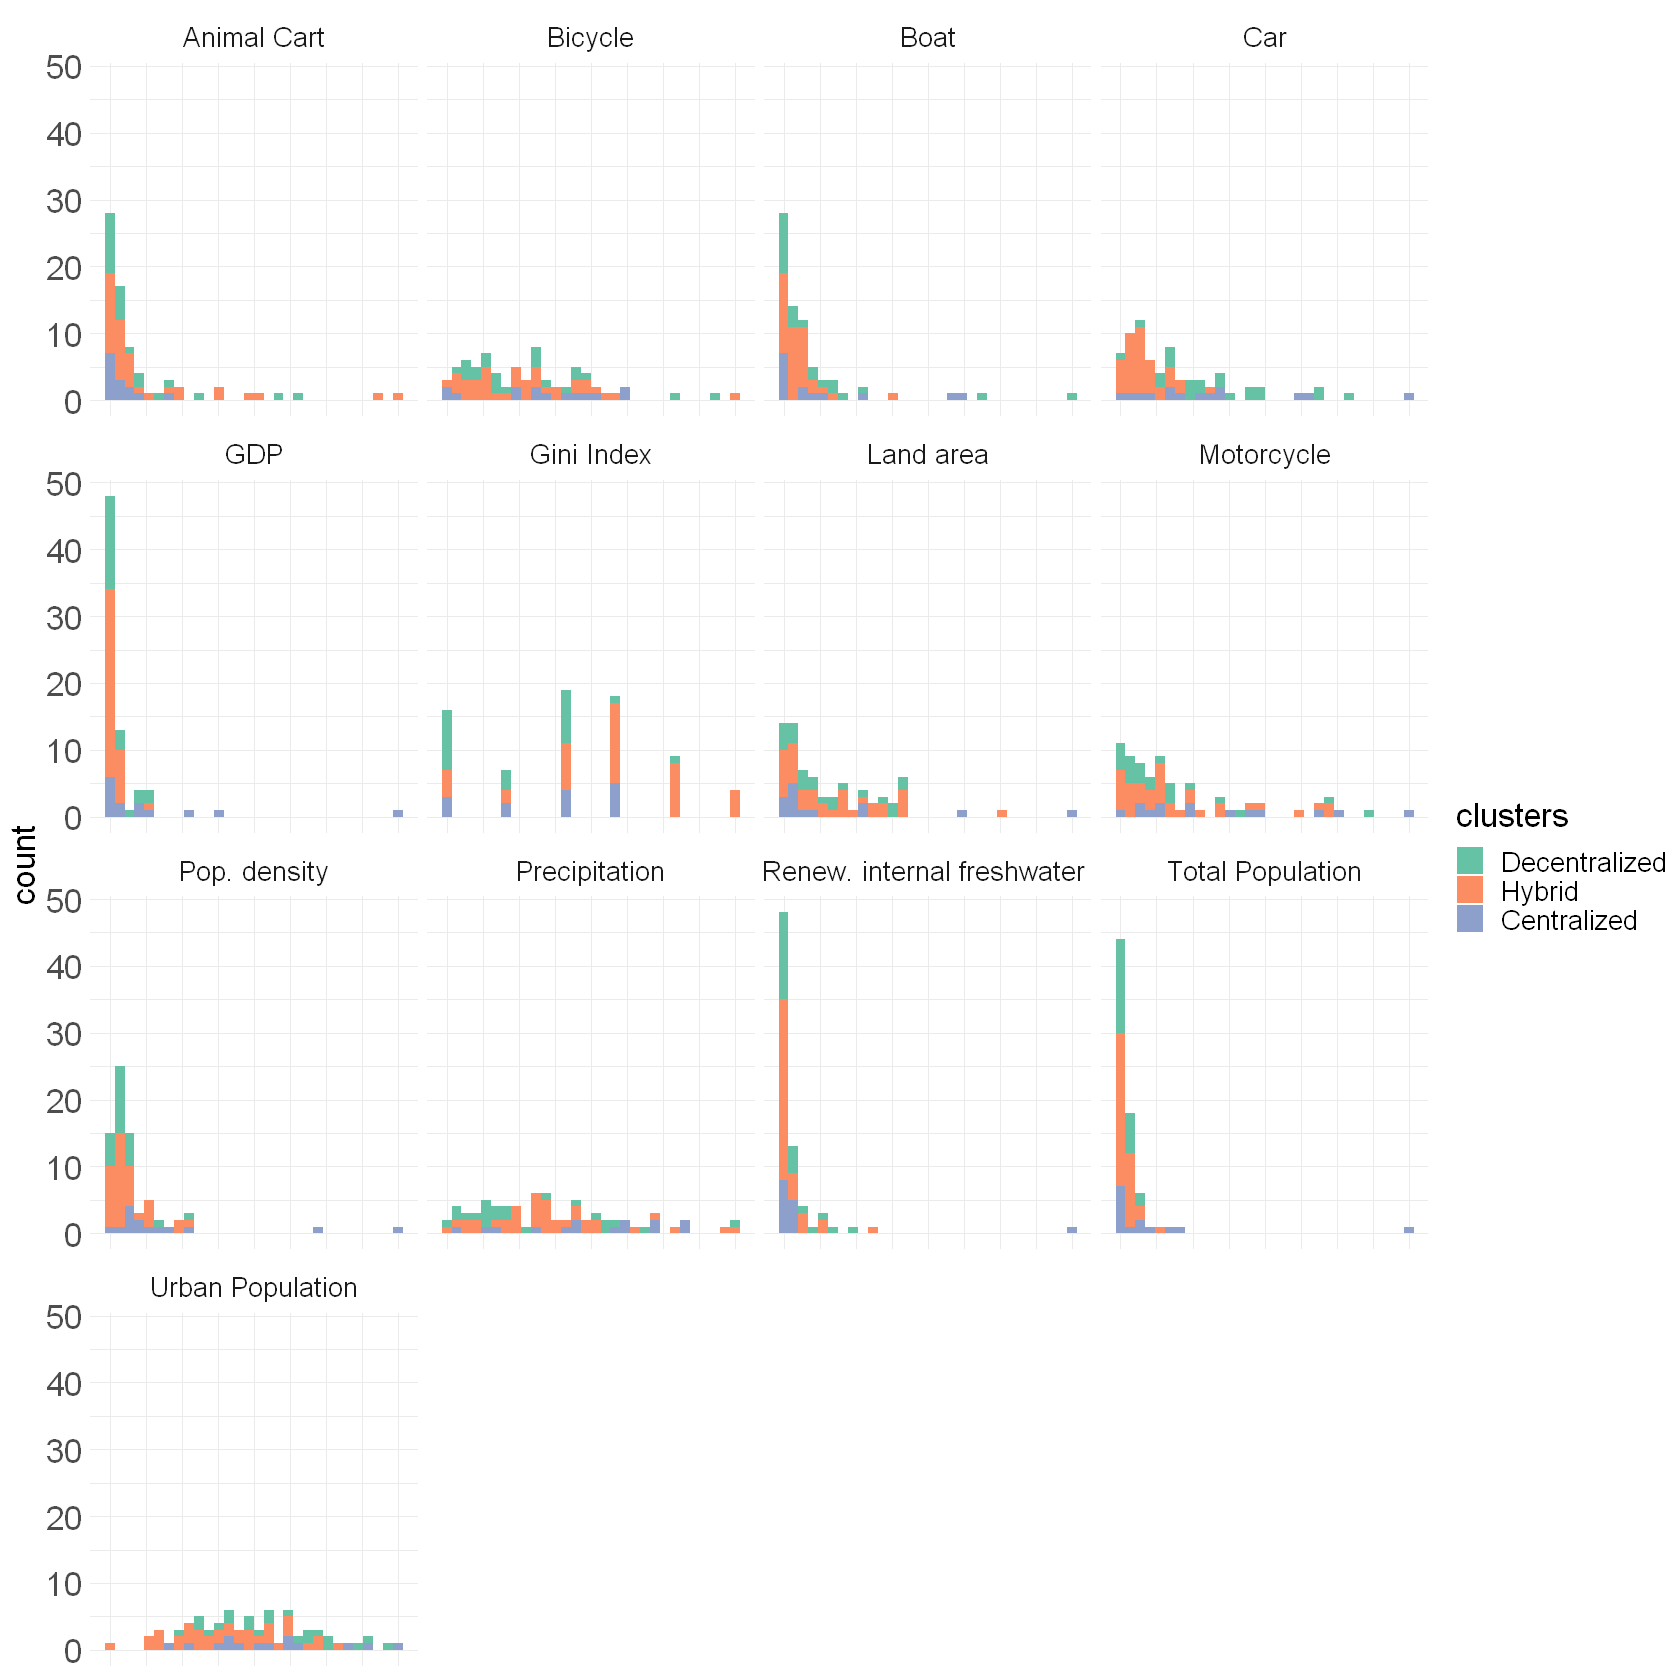

In [173]:
 ggplot(df_gathered, aes(Weight, fill = clusters)) +
  theme_minimal() +
  geom_histogram() +
  facet_wrap(~Measure)  + 
  scale_fill_manual(name = 'clusters', labels = c("Decentralized" , "Hybrid", "Centralized"),
                     values=c('#66c2a5','#fc8d62', '#8da0cb') ) +
    theme(text = element_text(size=20) , axis.title.x = element_blank(), axis.text.x=element_blank()) + #Font size
    theme(axis.text = element_text(size = 20)) + #All tick size  
    theme(axis.title = element_text(size = 20))  # Adjusting Axis Title   

In [181]:
summary(df[,c(2:14)])
describe(df[,c(2:14)])
stat.desc(df[,c(2:14)])

    Bicycle       Animal Cart       Motorcycle         Car       
 Min.   : 0.00   Min.   : 0.000   Min.   : 0.00   Min.   : 0.80  
 1st Qu.: 9.50   1st Qu.: 0.100   1st Qu.: 2.60   1st Qu.: 4.10  
 Median :20.70   Median : 1.300   Median : 9.60   Median : 8.90  
 Mean   :23.14   Mean   : 4.732   Mean   :16.84   Mean   :12.21  
 3rd Qu.:33.50   3rd Qu.: 4.200   3rd Qu.:21.40   3rd Qu.:17.10  
 Max.   :82.00   Max.   :41.500   Max.   :78.70   Max.   :57.80  
      Boat          Gini Index          GDP            Total Population   
 Min.   :0.0000   Min.   :0.0000   Min.   :0.000e+00   Min.   :0.000e+00  
 1st Qu.:0.0000   1st Qu.:0.1000   1st Qu.:1.091e+10   1st Qu.:6.323e+06  
 Median :0.3000   Median :0.2000   Median :2.349e+10   Median :1.585e+07  
 Mean   :0.5712   Mean   :0.2123   Mean   :1.237e+11   Mean   :5.239e+07  
 3rd Qu.:0.6000   3rd Qu.:0.3000   3rd Qu.:7.617e+10   3rd Qu.:3.717e+07  
 Max.   :5.9000   Max.   :0.5000   Max.   :2.713e+12   Max.   :1.353e+09  
 Urban Popula

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Bicycle,1,73,2.313973e+01,1.751907e+01,2.070000e+01,2.133051e+01,1.793946e+01,0.00000,8.200000e+01,8.200000e+01,1.04390622,1.2122744,2.050453e+00
Animal Cart,2,73,4.731507e+00,8.467337e+00,1.300000e+00,2.633898e+00,1.927380e+00,0.00000,4.150000e+01,4.150000e+01,2.63555552,7.0022975,9.910269e-01
Motorcycle,3,73,1.683562e+01,1.904426e+01,9.600000e+00,1.346949e+01,1.171254e+01,0.00000,7.870000e+01,7.870000e+01,1.45064598,1.1674800,2.228962e+00
Car,4,73,1.221370e+01,1.185053e+01,8.900000e+00,1.012712e+01,8.302560e+00,0.80000,5.780000e+01,5.700000e+01,1.64932380,2.5783441,1.387000e+00
Boat,5,73,5.712329e-01,1.029358e+00,3.000000e-01,3.203390e-01,4.447800e-01,0.00000,5.900000e+00,5.900000e+00,3.18290277,10.9634855,1.204772e-01
Gini Index,6,73,2.123288e-01,1.490201e-01,2.000000e-01,2.084746e-01,1.482600e-01,0.00000,5.000000e-01,5.000000e-01,0.01542214,-0.9651011,1.744149e-02
GDP,7,73,1.237189e+11,3.518519e+11,2.348627e+10,5.154857e+10,2.772260e+10,0.00000,2.713165e+12,2.713165e+12,5.79371253,38.0062878,4.118115e+10
Total Population,8,73,5.238674e+07,1.624214e+08,1.585436e+07,2.396418e+07,1.925599e+07,0.00000,1.352617e+09,1.352617e+09,7.07497910,53.3286219,1.900999e+07
Urban Population,9,73,4.442674e+01,1.951610e+01,4.262900e+01,4.370481e+01,2.025825e+01,0.00000,9.097900e+01,9.097900e+01,0.27903632,-0.4624309,2.284186e+00


,Bicycle,Animal Cart,Motorcycle,Car,Boat,Gini Index,GDP,Total Population,Urban Population,Pop. density,Land area,Renew. internal freshwater,Precipitation
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
nbr.val,73.0000000,73.0000000,73.000000,73.0000000,73.0000000,73.00000000,7.300000e+01,7.300000e+01,73.0000000,73.000000,7.300000e+01,7.300000e+01,7.300000e+01
nbr.null,3.0000000,18.0000000,2.000000,0.0000000,24.0000000,16.00000000,1.000000e+00,1.000000e+00,1.0000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00
nbr.na,0.0000000,0.0000000,0.000000,0.0000000,0.0000000,0.00000000,0.000000e+00,0.000000e+00,0.0000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
min,0.0000000,0.0000000,0.000000,0.8000000,0.0000000,0.00000000,0.000000e+00,0.000000e+00,0.0000000,0.000000,3.000000e+02,1.036886e+01,5.100000e+01
max,82.0000000,41.5000000,78.700000,57.8000000,5.9000000,0.50000000,2.713165e+12,1.352617e+09,90.9790000,1718.986667,2.973190e+06,3.108791e+05,3.240000e+03
range,82.0000000,41.5000000,78.700000,57.0000000,5.9000000,0.50000000,2.713165e+12,1.352617e+09,90.9790000,1718.986667,2.972890e+06,3.108687e+05,3.189000e+03
sum,1689.2000000,345.4000000,1229.000000,891.6000000,41.7000000,15.50000000,9.031477e+12,3.824232e+09,3243.1520000,11142.592706,3.621479e+07,9.646415e+05,8.899400e+04
median,20.7000000,1.3000000,9.600000,8.9000000,0.3000000,0.20000000,2.348627e+10,1.585436e+07,42.6290000,82.238615,2.736000e+05,2.329183e+03,1.146000e+03
mean,23.1397260,4.7315068,16.835616,12.2136986,0.5712329,0.21232877,1.237189e+11,5.238674e+07,44.4267397,152.638256,4.960930e+05,1.321427e+04,1.219096e+03
